# Create Sentence Embeddings by sBERT Method

## Test the clusterability functionality

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/RTER')

In [ ]:
import clusterability as clus
import dissimilarity_vis as dsv
import clustering_validation as clus_val

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load the Embeddings

In [ ]:
import pickle

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/RTER/data/NYT_test_embeddings_sentBERT.pk', 'rb') as f:
    embs = pickle.load(f)

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/RTER/data/NYT_test_span_embeddings_sentBERT.pk', 'rb') as f:
    embs_span = pickle.load(f)

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/RTER/data/NYT_test_span_ba_embeddings_sentBERT.pk', 'rb') as f:
    embs_span_ba = pickle.load(f)

In [ ]:
embs_pca = PCA(n_components=2).fit_transform(embs)

In [ ]:
embs_span_pca = PCA(n_components=2).fit_transform(embs_span)

In [ ]:
embs_span_ba_pca = PCA(n_components=2).fit_transform(embs_span_ba)

# Clusterability: Spatial Histogram

In [ ]:
kls_embs = clus.spaHist(embs_pca)
kls_embs.mean(), kls_embs.std()

(0.6093191330447095, 0.06160391695586031)

In [ ]:
kls_embs_span = clus.spaHist(embs_span_pca)
kls_embs_span.mean(), kls_embs_span.std()

(0.9320558617642075, 0.0890270847557754)

In [ ]:
kls_embs_span_ba = clus.spaHist(embs_span_ba_pca)
kls_embs_span_ba.mean(), kls_embs_span_ba.std()

(0.8443801150254983, 0.08997723525405776)

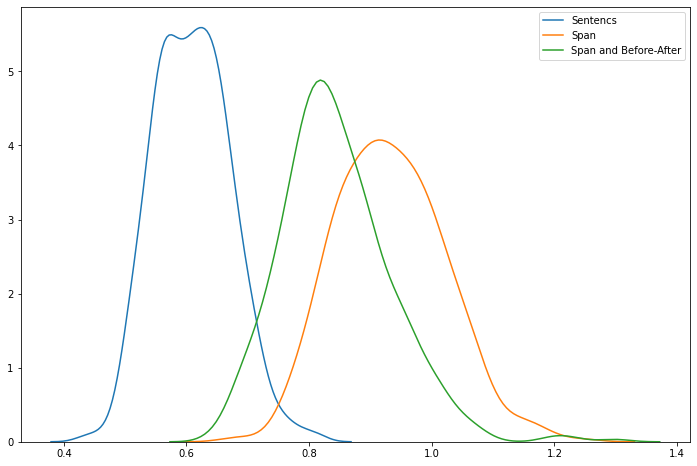

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(kls_embs, hist=False, label="Sentencs")
sns.distplot(kls_embs_span, hist=False, label="Span")
sns.distplot(kls_embs_span_ba, hist=False, label="Span and Before-After")
plt.legend()

# Clusterability:Hopkins Stastitics


In [ ]:
embs_pca.shape[0]*0.3

118.8

In [ ]:
embs_hopkins = []
for i in range(500):
    embs_hopkins.append(clus.hopkins(embs_pca, 200))

In [ ]:
embs_span_hopkins = []
for i in range(500):
    embs_span_hopkins.append(clus.hopkins(embs_span_pca, 200))

In [ ]:
embs_span_ba_hopkins = []
for i in range(500):
    embs_span_ba_hopkins.append(clus.hopkins(embs_span_ba_pca, 200))

In [ ]:
np.mean(embs_hopkins), np.mean(embs_span_hopkins), np.mean(embs_span_ba_hopkins)

(0.8912510810637114, 0.9425942796935657, 0.8835524878108364)

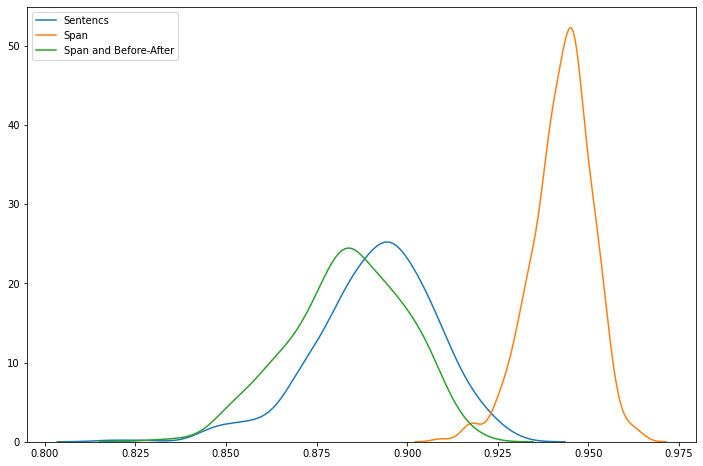

In [ ]:
plt.figure(figsize=(12, 8))
sns.distplot(embs_hopkins, hist=False, label="Sentencs")
sns.distplot(embs_span_hopkins, hist=False, label="Span")
sns.distplot(embs_span_ba_hopkins, hist=False, label="Span and Before-After")
plt.legend()

# Clustering Validation against Known Labels

## Load the original labels

In [ ]:
NYT_test_df_nnd = pd.read_csv('/content/drive/My Drive/Colab Notebooks/RTER/data/NYT_test_df_nnd.csv')

In [ ]:
NYT_test_df_nnd.shape

(396, 13)

In [ ]:
NYT_test_df_nnd.columns

Index(['sentId', 'articleId', 'em1', 'em1label', 'em1start', 'em2', 'em2label',
       'em2start', 'relation', 'sentText', 'relIdx', 'sentTextClnd',
       'sentTextClndUni'],
      dtype='object')

In [ ]:
labels_orig = NYT_test_df_nnd.relIdx
labels_orig[:5]

0    1
1    2
2    1
3    3
4    4
Name: relIdx, dtype: int64

In [ ]:
labels_orig.nunique()

12

## Cluster PCA of Embeddings

In [ ]:
clusts_embs = KMeans(init='k-means++', n_clusters=12, n_init=20, random_state = 21)
km_embs_pca = clusts_embs.fit(np.array(embs_pca))

In [ ]:
clusts_embs = KMeans(init='k-means++', n_clusters=12, n_init=20, random_state = 21)
km_embs_span_pca = clusts_embs.fit(np.array(embs_span_pca))

In [ ]:
clusts_embs = KMeans(init='k-means++', n_clusters=12, n_init=20, random_state = 21)
km_embs_span_ba_pca = clusts_embs.fit(np.array(embs_span_ba_pca))

In [ ]:
km_embs_pca_meas = clus_val.clustering_measures(labels_orig, km_embs_pca.labels_)
km_embs_span_pca_meas = clus_val.clustering_measures(labels_orig, km_embs_span_pca.labels_)
km_embs_span_ba_pca_meas = clus_val.clustering_measures(labels_orig, km_embs_span_ba_pca.labels_)
meas_pca_df = pd.DataFrame([km_embs_pca_meas, km_embs_span_pca_meas, km_embs_span_ba_pca_meas])
meas_pca_df.index = ['Sentence', 'Span', 'Span_BA']

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Text major ticklabel objects>)

<Figure size 864x648 with 0 Axes>

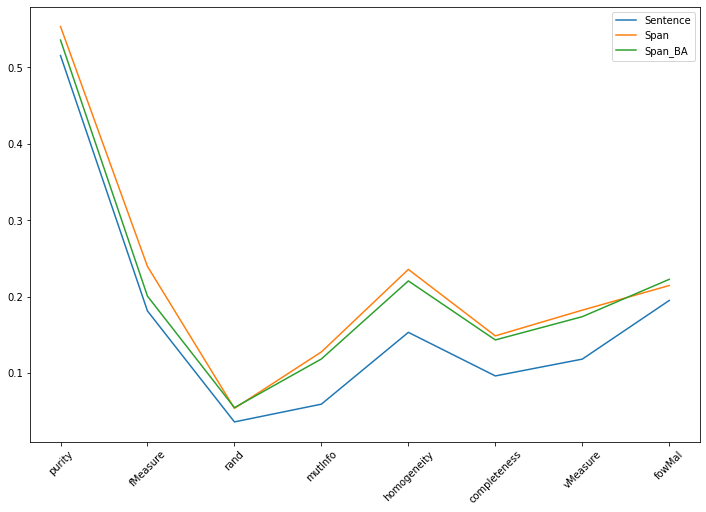

In [ ]:
plt.figure(figsize=(12, 9))
meas_pca_df.T.plot(figsize=(12, 8))
plt.xticks(rotation=45)

## Cluster Embeddings

In [ ]:
clusts_embs = KMeans(init='k-means++', n_clusters=12, n_init=20, random_state = 21)
km_embs = clusts_embs.fit(np.array(embs))

In [ ]:
clusts_embs = KMeans(init='k-means++', n_clusters=12, n_init=20, random_state = 21)
km_embs_span = clusts_embs.fit(np.array(embs_span))

In [ ]:
clusts_embs = KMeans(init='k-means++', n_clusters=12, n_init=20, random_state = 21)
km_embs_span_ba = clusts_embs.fit(np.array(embs_span_ba))

In [ ]:
km_embs_meas = clus_val.clustering_measures(labels_orig, km_embs.labels_)
km_embs_span_meas = clus_val.clustering_measures(labels_orig, km_embs_span.labels_)
km_embs_span_ba_meas = clus_val.clustering_measures(labels_orig, km_embs_span_ba.labels_)
meas_df = pd.DataFrame([km_embs_meas, km_embs_span_meas, km_embs_span_ba_meas])
meas_df.index = ['Sentence', 'Span', 'Span_BA']

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Text major ticklabel objects>)

<Figure size 864x648 with 0 Axes>

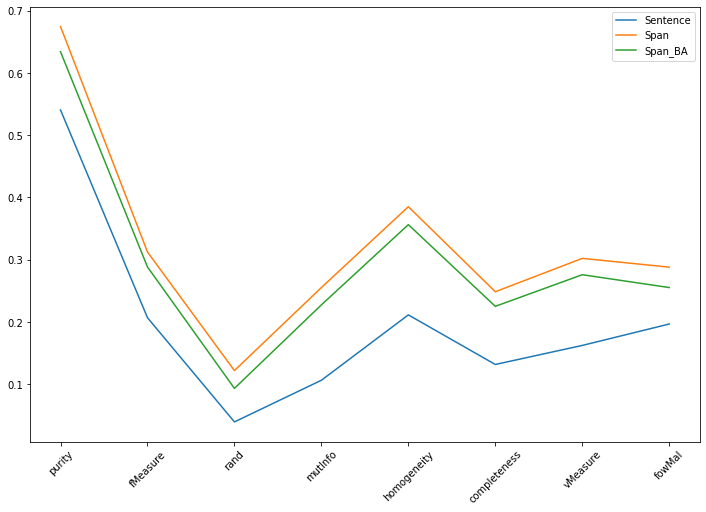

In [ ]:
plt.figure(figsize=(12, 9))
meas_df.T.plot(figsize=(12, 8))
plt.xticks(rotation=45)

## Cluster 49 PCAs with 80% of Variance

In [ ]:
clusts_embs = KMeans(init='k-means++', n_clusters=12, n_init=20, random_state = 21)
km_embs_pca49 = clusts_embs.fit(np.array(PCA(n_components=49).fit_transform(embs)))

In [ ]:
clusts_embs = KMeans(init='k-means++', n_clusters=12, n_init=20, random_state = 21)
km_embs_span_pca49 = clusts_embs.fit(np.array(PCA(n_components=49).fit_transform(embs_span)))

In [ ]:
clusts_embs = KMeans(init='k-means++', n_clusters=12, n_init=20, random_state = 21)
km_embs_span_ba_pca49 = clusts_embs.fit(np.array(PCA(n_components=49).fit_transform(embs_span_ba)))

In [ ]:
km_embs_pca49_meas = clus_val.clustering_measures(labels_orig, km_embs_pca49.labels_)
km_embs_span_pca49_meas = clus_val.clustering_measures(labels_orig, km_embs_span_pca49.labels_)
km_embs_span_ba_pca49_meas = clus_val.clustering_measures(labels_orig, km_embs_span_ba_pca49.labels_)
meas_pca49_df = pd.DataFrame([km_embs_pca49_meas, km_embs_span_pca49_meas, km_embs_span_ba_pca49_meas])
meas_pca49_df.index = ['Sentence', 'Span', 'Span_BA']

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 <a list of 10 Text major ticklabel objects>)

<Figure size 864x648 with 0 Axes>

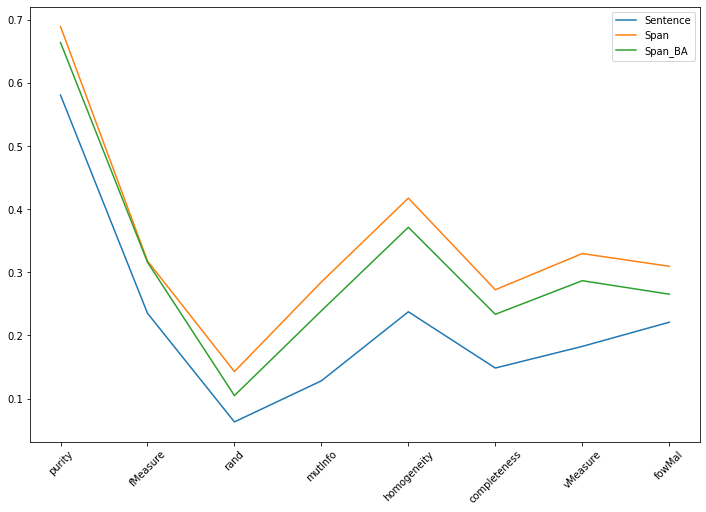

In [ ]:
plt.figure(figsize=(12, 9))
meas_pca49_df.T.plot(figsize=(12, 8))
plt.xticks(rotation=45)

# Visualize the Clustering-bility 

In [ ]:
dist_mat_embs = squareform(pdist(PCA(n_components=49).fit_transform(embs)))
dist_mat_embs_span = squareform(pdist(PCA(n_components=49).fit_transform(embs_span)))
dist_mat_embs_span_ba = squareform(pdist(PCA(n_components=49).fit_transform(embs_span_ba)))

In [ ]:
N = len(dist_mat_embs)

ordered_dists= []  
titles = []
ordered_dist_mat_embs, _, _ = dsv.compute_ordering_matrix(dist_mat_embs)
ordered_dists.append(ordered_dist_mat_embs)
titles.append("Whole Sentences")
ordered_dist_mat_embs_span, _, _ = dsv.compute_ordering_matrix(dist_mat_embs_span)
ordered_dists.append(ordered_dist_mat_embs_span)
titles.append("Span between Entity Mentions")
ordered_dist_mat_embs_span_ba, _, _ = dsv.compute_ordering_matrix(dist_mat_embs_span_ba)
ordered_dists.append(ordered_dist_mat_embs_span_ba)
titles.append("Span between and Before-After Entity Mentions")


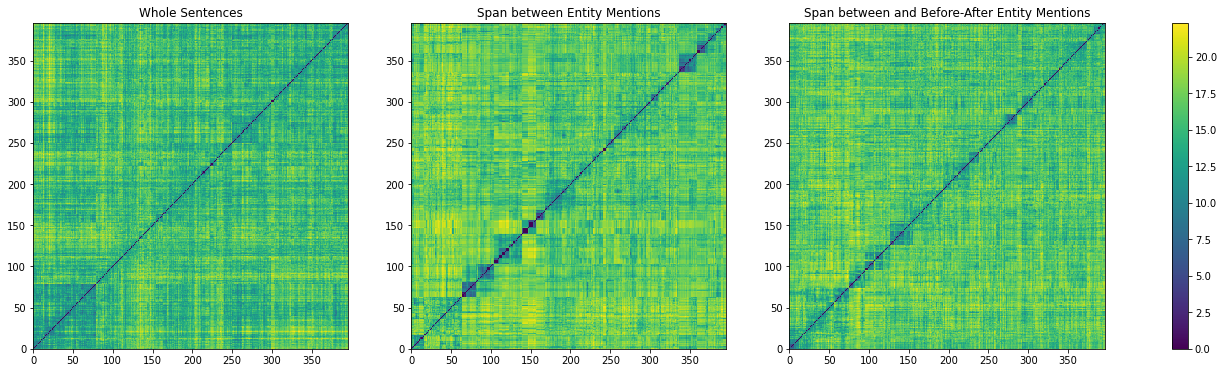

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
for j in range(3):    
    im = axes[j].pcolormesh(ordered_dists[j])
    axes[j].set_xlim([0,N])
    axes[j].set_ylim([0,N])
    axes[j].set_title(titles[j])
fig.colorbar(im, ax=axes.ravel().tolist())
plt.show()

## Embeddings of Whole Sentences by sBERT